<a href="https://colab.research.google.com/github/TheChanRProject/SCDSD_NLP_1/blob/master/SCDSD_NLP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 

In [0]:
import tensorflow as tf 

In [0]:
import nltk 

In [5]:
ls 

sample_data/


In [6]:
cd sample_data

/content/sample_data


In [7]:
ls

anscombe.json*                mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md*


In [13]:
!git clone https://github.com/TheChanRProject/SCDSD-NLP1-Data.git

Cloning into 'SCDSD-NLP1-Data'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 17 (delta 1), reused 14 (delta 1), pack-reused 0
Unpacking objects: 100% (17/17), done.


In [14]:
ls

sample_data/  SCDSD-NLP1-Data/


In [15]:
cd SCDSD-NLP1-Data 

/content/SCDSD-NLP1-Data


In [16]:
ls 

data/  README.md  some_file.csv


In [17]:
!cat README.md 

# SCDSD-NLP1-Data

In [21]:
cd data 

/content/SCDSD-NLP1-Data/data


In [22]:
ls

facebookProfiles.txt  findNumbers.txt  yelp.csv


In [0]:
import re 

In [30]:
file = open("findNumbers.txt", "r") 
for line in file.readlines():
  print(line)
  print(re.findall(r"(\d{3}\D{0,3}\d{3}\D{0,3}\d{4})", line))

So yeah I was calling my girlfriend last night and she changed her number.

I literally dialed 909-829-1019 like 15 times, but

it kept going to voicemail so I was literally freaking out, but then she gave me her new number 9099280191 . At that point,

I wanted to make sure her email was still the same since I needed to send her links.

My cousin mistook my number 909.731.2567 as (909)-732-2568



In [31]:
!cat facebookProfiles.txt 

https://www.facebook.com/rchatter33
https://www.facebook.com/nishant.jain.1426
https://www.facebook.com/ishaan.gandhi?__tn__=%2CdC-R-R&eid=ARDJ5ju8o58_lKx9PdGb3ApygOlJjPFQIRyFQSAyyFsniKPXr65mCO2ZDv8PYztygqrHJxI_WqhiYgf8&hc_ref=ARTMXPrT57MzagWi7I3sgjEQ9wFxnpnrpXzLtMiYAJzw0uA63SUeYk2lqr2L-sAONiM&fref=nf
https://www.facebook.com/pages/DrGrubbs-California-Fresh/183138575057112
https://www.facebook.com/SMART-Tutoring-169261441780/


In [51]:
file = open("facebookProfiles.txt", "r")
file_lines = "".join(file.readlines()) 
file_lines = file_lines.replace("https://www.facebook.com/", "").replace("/", "")
print(file_lines)
print(re.findall(r"\w{3,10}\D{0,1}\w{8,10}\D{0,1}", file_lines)) 

rchatter33
nishant.jain.1426
ishaan.gandhi?__tn__=%2CdC-R-R&eid=ARDJ5ju8o58_lKx9PdGb3ApygOlJjPFQIRyFQSAyyFsniKPXr65mCO2ZDv8PYztygqrHJxI_WqhiYgf8&hc_ref=ARTMXPrT57MzagWi7I3sgjEQ9wFxnpnrpXzLtMiYAJzw0uA63SUeYk2lqr2L-sAONiM&fref=nf
pagesDrGrubbs-California-Fresh183138575057112
SMART-Tutoring-169261441780

['eid=ARDJ5ju8o5', '8_lKx9PdGb3ApygOlJjPF', 'QIRyFQSAyyFsniKPXr65mC', 'O2ZDv8PYztygqrHJxI_Wqh', 'hc_ref=ARTMXPrT57M', 'zagWi7I3sgjEQ9wFxnpnrp', 'XzLtMiYAJzw0uA63SUeYk', 'pagesDrGrubbs-', 'California-Fresh18313', 'SMART-Tutoring-', '169261441780\n']


In [52]:
ls

facebookProfiles.txt  findNumbers.txt  yelp.csv


In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import nltk 
from nltk.corpus import stopwords 

In [0]:
yelp = pd.read_csv("yelp.csv") 

In [55]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [56]:
yelp.shape 

(10000, 10)

In [57]:
yelp.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [58]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [0]:
yelp['text length'] = yelp['text'].apply(len)  

In [61]:
yelp.head() 

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


In [63]:
!pip install jupyterthemes 

     |████████████████████████████████| 7.0MB 2.7MB/s 
     |████████████████████████████████| 51kB 15.5MB/s 
     |████████████████████████████████| 9.0MB 23.9MB/s 
     |████████████████████████████████| 51kB 14.2MB/s 
ERROR: google-colab 1.0.0 has requirement notebook~=5.2.0, but you'll have notebook 5.7.8 which is incompatible.
  Found existing installation: notebook 5.2.2
    Uninstalling notebook-5.2.2:
      Successfully uninstalled notebook-5.2.2


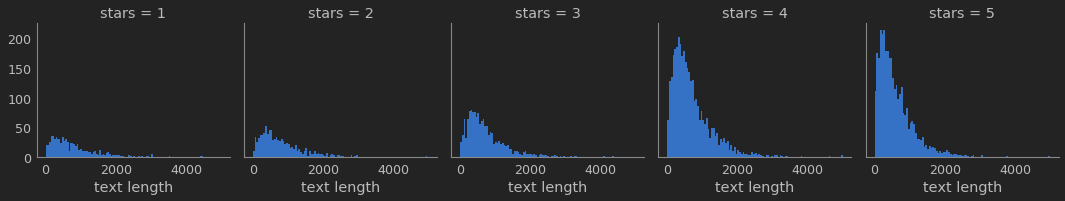

In [67]:
from jupyterthemes import jtplot 
jtplot.style(theme="monokai", grid=False)  
g = sns.FacetGrid(data=yelp,col='stars')
g.map(plt.hist, 'text length', bins=100) 

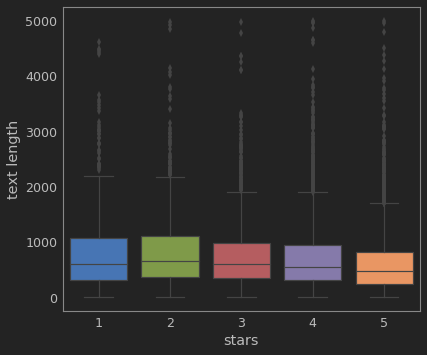

In [68]:
sns.boxplot(x="stars", y="text length", data=yelp) 

In [0]:
stars = yelp.groupby('stars').mean() 

In [70]:
stars.corr() 

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


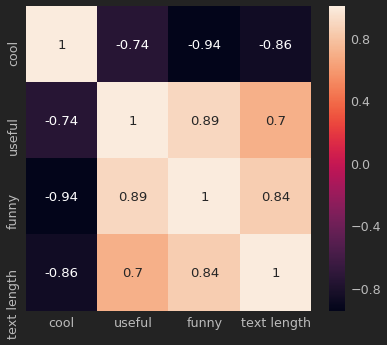

In [71]:
sns.heatmap(data=stars.corr(), annot=True) 

In [72]:
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)] 
yelp_class.shape 

(4086, 11)

In [0]:
X = yelp_class['text'] 
Y = yelp_class['stars'] 

In [74]:
X[3] 

"Rosie, Dakota, and I LOVE Chaparral Dog Park!!! It's very convenient and surrounded by a lot of paths, a desert xeriscape, baseball fields, ballparks, and a lake with ducks.\n\nThe Scottsdale Park and Rec Dept. does a wonderful job of keeping the park clean and shaded.  You can find trash cans and poopy-pick up mitts located all over the park and paths.\n\nThe fenced in area is huge to let the dogs run, play, and sniff!"

In [76]:
import nltk 
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [77]:
import string 

def text_preprocess(text):
  
  nopunc = [char for char in text if char not in string.punctuation] 
  nopunc = ''.join(nopunc) 
  
  return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]  

sample = "Hey Jude! Beatles is not at AMC, it is too old in 2019." 

print(text_preprocess(sample)) 

['Hey', 'Jude', 'Beatles', 'AMC', 'old', '2019']


In [0]:
from sklearn.feature_extraction.text import CountVectorizer 

wordTransform = CountVectorizer(analyzer=text_preprocess).fit(X) 

In [79]:
len(wordTransform.vocabulary_) 

26435

In [80]:
X[24] 

"I love this place! I have been coming here for ages.\nMy favorites: Elsa's Chicken sandwich, any of their burgers, dragon chicken wings, china's little chicken sandwich, and the hot pepper chicken sandwich. The atmosphere is always fun and the art they display is very abstract but totally cool!"

In [82]:
transform25 = wordTransform.transform([X[24]]) 
print(transform25)

  (0, 2099)	1
  (0, 3006)	1
  (0, 8909)	1
  (0, 9151)	1
  (0, 9295)	1
  (0, 9616)	1
  (0, 9727)	1
  (0, 10847)	1
  (0, 11443)	3
  (0, 11492)	1
  (0, 11878)	1
  (0, 12221)	1
  (0, 13323)	1
  (0, 13520)	1
  (0, 14481)	1
  (0, 15165)	1
  (0, 16379)	1
  (0, 17812)	1
  (0, 17951)	1
  (0, 20044)	1
  (0, 20298)	1
  (0, 22077)	3
  (0, 24797)	1
  (0, 26102)	1


In [83]:
print(wordTransform.get_feature_names()[11443]) 
print(wordTransform.get_feature_names()[22077]) 

chicken
sandwich


In [0]:
X = wordTransform.transform(X) 

In [85]:
X.shape 

(4086, 26435)

In [86]:
X.nnz 

222391

In [87]:
4086 * 26435 

108013410

In [89]:
(100 * 222391) / 108013410 

0.2058920276658241

In [0]:
from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101) 



In [91]:
from sklearn.naive_bayes import MultinomialNB 

nb = MultinomialNB() 

nb.fit(X_train, Y_train) 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
predictions = nb.predict(X_test) 
probs = nb.predict_proba(X_test) 

In [93]:
from sklearn.metrics import confusion_matrix, classification_report 

print(confusion_matrix(Y_test, predictions)) 
print('\n') 


[[157  71]
 [ 24 974]]




In [94]:
!pip install scikit-plot 

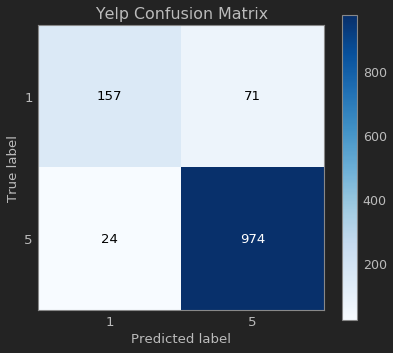

In [99]:
from scikitplot.metrics import plot_confusion_matrix, plot_roc  

plot_confusion_matrix(Y_test, predictions, title="Yelp Confusion Matrix") 

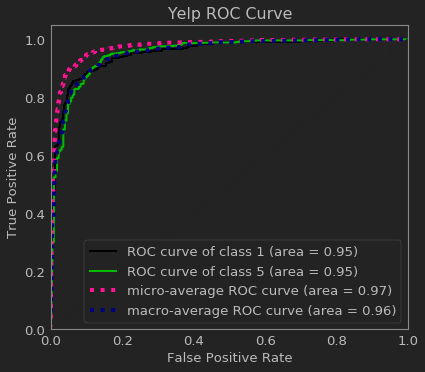

In [100]:
plot_roc(Y_test, probs, title="Yelp ROC Curve")  

In [101]:
print(classification_report(Y_test, predictions)) 

              precision    recall  f1-score   support

           1       0.87      0.69      0.77       228
           5       0.93      0.98      0.95       998

   micro avg       0.92      0.92      0.92      1226
   macro avg       0.90      0.83      0.86      1226
weighted avg       0.92      0.92      0.92      1226



# Ways to Improve the Model: 

1. Apply the SMOTE Method to Avoid Class Imbalance 

2. Look at the histograms again for the reviews and try out the usage of different prior probability distributions 

3. Tweaks on the preprocess function 

4. Do Cross Validation 

5. Change the Proportion of Split for Training and Testing  

# Try Out Other Classifiers 

1. Logistic Regression [Theory the next workshop] - NLP

2. Linear Support Vector Machine [The 4th workshop] - NLP

3. Deep Learning - Recurrent Neural Network [The 5th workshop] - NLP  

## Hyper-parameter Tuning 

1. Randomized Search 

2. Grid Search 

3. Bayesian Optimization 


